In [2]:
# 
# DAY 3: Data Wrangling: a way to address data quality issues such as missing values, duplicates, outliers and formatting inconsistencies
# 
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 
# Load the data
bike_data = pd.read_csv("../data/bikes.csv")
bike_data

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,4.00,1.00,100.00,9.000000,cloudy,False,False,winter,11566
726,31/12/2016,7.50,5.00,90.00,13.312500,cloudy,False,True,winter,11424
727,01/01/2017,7.00,4.75,90.00,14.125000,rain,False,True,winter,6421
728,02/01/2017,3.25,0.50,82.50,11.166667,clear,True,False,winter,11823


In [4]:
# 
# Get information on the csv data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              730 non-null    object 
 1   real_temperature  730 non-null    float64
 2   feel_temperature  657 non-null    float64
 3   humidity          730 non-null    float64
 4   wind_speed        730 non-null    float64
 5   weather_code      679 non-null    object 
 6   is_holiday        730 non-null    bool   
 7   is_weekend        730 non-null    bool   
 8   season            694 non-null    object 
 9   count             730 non-null    int64  
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [5]:
# 
# Get basic statistics on columns that have numerical values
bike_data.describe()

,real_temperature,feel_temperature,humidity,wind_speed,count
count,730.000000,657.000000,730.000000,730.000000,730.000000
mean,12.481849,11.506088,73.034932,15.954665,27268.454795
std,5.086471,6.110233,10.245519,6.221691,8607.700254
min,0.250000,-2.000000,40.500000,2.770833,4869.000000
25%,8.812500,6.250000,65.250000,11.208333,21940.750000
50%,12.625000,12.500000,73.750000,15.166667,27011.500000
75%,16.187500,16.000000,80.750000,19.906250,33431.250000
max,28.500000,29.000000,100.000000,41.900000,72504.000000


In [6]:
# 
# Look at the shape of the data
bike_data.shape

(730, 10)

In [7]:
# 
# Randomize the selection of a number of rows
bike_data.sample(10)

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
662,28/10/2016,14.75,14.75,73.25,13.500000,broken_clouds,False,False,autumm,33420
539,26/06/2016,16.00,16.00,77.00,19.270833,scattered_clouds,False,True,summer,29112
441,20/03/2016,8.00,6.25,76.00,12.791667,cloudy,False,True,spring,17043
34,07/02/2015,4.25,2.00,82.75,11.312500,broken_clouds,False,True,winter,13149
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
436,15/03/2016,7.00,4.25,87.00,12.687500,broken_clouds,False,False,spring,25224
316,16/11/2015,14.00,14.00,72.00,21.875000,scattered_clouds,False,False,autumm,26507
160,13/06/2015,17.25,17.25,83.00,18.333333,cloudy,False,True,summer,30298
305,05/11/2015,15.00,15.00,88.00,14.333333,NaN,False,False,autumm,24503
395,03/02/2016,6.00,2.75,67.25,22.125000,clear,False,False,winter,24436


In [8]:
# 
# Select one column
feel_temp = bike_data["feel_temperature"]
feel_temp

0      0.00
1      7.25
2      5.75
3      5.50
4      6.75
       ... 
725    1.00
726    5.00
727    4.75
728    0.50
729    0.50
Name: feel_temperature, Length: 730, dtype: float64

In [9]:
# 
# Select multiple columns (slicing or sub-setting)
temp = bike_data[["real_temperature", "feel_temperature"]]
temp

,real_temperature,feel_temperature
0,2.75,0.00
1,9.00,7.25
2,8.00,5.75
3,9.00,5.50
4,9.00,6.75
...,...,...
725,4.00,1.00
726,7.50,5.00
727,7.00,4.75
728,3.25,0.50


In [10]:
# 
# Make a copy to perform different analysis strategies on the copies
# Strategy 1: Remove/Drop all rows with null values (useful when you have a very large dataset with millions of rows)
# Strategy 2: Replace the null values with either a median or mean values of that column with numerical values 
toy_bikes = bike_data.copy()

In [11]:
# 
# List a random sample of 5 rows
toy_bikes.sample(5)

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
413,21/02/2016,13.00,13.00,78.25,30.791667,broken_clouds,False,True,winter,14670
25,29/01/2015,3.00,-2.00,75.00,26.562500,scattered_clouds,False,False,winter,21275
101,15/04/2015,17.00,17.00,54.75,14.062500,clear,False,False,spring,37470
539,26/06/2016,16.00,16.00,77.00,19.270833,scattered_clouds,False,True,summer,29112
568,25/07/2016,20.75,20.75,58.50,18.416667,clear,False,False,summer,40577


In [12]:
# 
# Check number of missing entries per column
toy_bikes.isnull().sum()

date                 0
real_temperature     0
feel_temperature    73
humidity             0
wind_speed           0
weather_code        51
is_holiday           0
is_weekend           0
season              36
count                0
dtype: int64

In [13]:
# 
# Drop missing (null/NaN) entries temporarily and show how the table would look like
toy_bikes.dropna()

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601
...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,4.00,1.00,100.00,9.000000,cloudy,False,False,winter,11566
726,31/12/2016,7.50,5.00,90.00,13.312500,cloudy,False,True,winter,11424
727,01/01/2017,7.00,4.75,90.00,14.125000,rain,False,True,winter,6421
728,02/01/2017,3.25,0.50,82.50,11.166667,clear,True,False,winter,11823


In [14]:
# 
# Check if there are null (missing) values remaining after applying dropna()
toy_bikes.isnull().sum()

date                 0
real_temperature     0
feel_temperature    73
humidity             0
wind_speed           0
weather_code        51
is_holiday           0
is_weekend           0
season              36
count                0
dtype: int64

In [15]:
# 
# Drop Null (missing) values permanently
toy_bikes.dropna(inplace=True)
#
# Resetting the index values since the rows that were removed also had indices and the dataframe didn't reset
toy_bikes.reset_index(drop=True)
# 
# Check if there are null values remaining
toy_bikes.isnull().sum()

date                0
real_temperature    0
feel_temperature    0
humidity            0
wind_speed          0
weather_code        0
is_holiday          0
is_weekend          0
season              0
count               0
dtype: int64

In [16]:
# 
# Make a copy of the original data to use strategy 2
bikes_imputted = bike_data.copy()
# 
# Impute the missing data for 'feel_temperature'
# Calculate the mean of the column
mean_feel_temperature = bikes_imputted["feel_temperature"].mean()
# 
# Fill missing values
bikes_temp_imputted = bikes_imputted["feel_temperature"].fillna(mean_feel_temperature)
bikes_temp_imputted

0      0.00
1      7.25
2      5.75
3      5.50
4      6.75
       ... 
725    1.00
726    5.00
727    4.75
728    0.50
729    0.50
Name: feel_temperature, Length: 730, dtype: float64

In [17]:
#
# Get the minimum 'feel_temperature' value
bikes_temp_imputted.min()

-2.0

In [18]:
# 
# Get the maximum 'feel_temperature' value
bikes_temp_imputted.max()

29.0

In [19]:
# 
# Get the mode of 'feel_temparature' values
bikes_temp_imputted.mode()

0    11.506088
Name: feel_temperature, dtype: float64

In [20]:
# 
# Get the frequency of each unique value
bikes_temp_imputted.value_counts()

feel_temperature
 11.506088    73
 13.000000    29
 14.000000    25
 6.000000     22
 12.000000    21
              ..
 10.500000     1
 25.500000     1
 22.500000     1
 21.750000     1
-0.750000      1
Name: count, Length: 99, dtype: int64

In [21]:
# 
# Creating a new column 'feel_temp_imputted' from a DataFrame copy
bikes_imputted["feel_temp_imputted"] = bikes_imputted["feel_temperature"].fillna(mean_feel_temperature)
# 
# Creating a new column that has the average of 'feel_temperature' and the 'feel_temp_imputted' columns
bikes_imputted["average_temperature"] = (bikes_imputted["feel_temp_imputted"] + bikes_imputted["real_temperature"]) / 2
# 
# bikes_imputted.sample(20)
bikes_imputted

,date,real_temperature,feel_temperature,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count,feel_temp_imputted,average_temperature
0,04/01/2015,2.75,0.00,93.00,7.500000,broken_clouds,False,True,winter,9234,0.00,1.375
1,05/01/2015,9.00,7.25,81.50,8.854167,broken_clouds,False,False,winter,20372,7.25,8.125
2,06/01/2015,8.00,5.75,79.75,16.000000,clear,False,False,winter,20613,5.75,6.875
3,07/01/2015,9.00,5.50,81.00,19.760870,scattered_clouds,False,False,winter,21064,5.50,7.250
4,08/01/2015,9.00,6.75,79.50,20.479167,rain,False,False,winter,15601,6.75,7.875
...,...,...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,4.00,1.00,100.00,9.000000,cloudy,False,False,winter,11566,1.00,2.500
726,31/12/2016,7.50,5.00,90.00,13.312500,cloudy,False,True,winter,11424,5.00,6.250
727,01/01/2017,7.00,4.75,90.00,14.125000,rain,False,True,winter,6421,4.75,5.875
728,02/01/2017,3.25,0.50,82.50,11.166667,clear,True,False,winter,11823,0.50,1.875


In [22]:
# 
# Drop 'feel_temperature' and 'real_temperature' columns 
bikes_imputted.drop(["feel_temperature","real_temperature"], axis=1, inplace=True)
bikes_imputted

,date,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,count,feel_temp_imputted,average_temperature
0,04/01/2015,93.00,7.500000,broken_clouds,False,True,winter,9234,0.00,1.375
1,05/01/2015,81.50,8.854167,broken_clouds,False,False,winter,20372,7.25,8.125
2,06/01/2015,79.75,16.000000,clear,False,False,winter,20613,5.75,6.875
3,07/01/2015,81.00,19.760870,scattered_clouds,False,False,winter,21064,5.50,7.250
4,08/01/2015,79.50,20.479167,rain,False,False,winter,15601,6.75,7.875
...,...,...,...,...,...,...,...,...,...,...
725,30/12/2016,100.00,9.000000,cloudy,False,False,winter,11566,1.00,2.500
726,31/12/2016,90.00,13.312500,cloudy,False,True,winter,11424,5.00,6.250
727,01/01/2017,90.00,14.125000,rain,False,True,winter,6421,4.75,5.875
728,02/01/2017,82.50,11.166667,clear,True,False,winter,11823,0.50,1.875


In [23]:
bikes_imputted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 730 non-null    object 
 1   humidity             730 non-null    float64
 2   wind_speed           730 non-null    float64
 3   weather_code         679 non-null    object 
 4   is_holiday           730 non-null    bool   
 5   is_weekend           730 non-null    bool   
 6   season               694 non-null    object 
 7   count                730 non-null    int64  
 8   feel_temp_imputted   730 non-null    float64
 9   average_temperature  730 non-null    float64
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [24]:
# 
# Fill missing values in 'season' column using interpolation by padding
# bikes_imputted['season'].interpolate(method='pad', inplace=True) --------->>> DEPRECATED
bikes_imputted['season'] = bikes_imputted['season'].ffill()
bikes_imputted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 730 non-null    object 
 1   humidity             730 non-null    float64
 2   wind_speed           730 non-null    float64
 3   weather_code         679 non-null    object 
 4   is_holiday           730 non-null    bool   
 5   is_weekend           730 non-null    bool   
 6   season               730 non-null    object 
 7   count                730 non-null    int64  
 8   feel_temp_imputted   730 non-null    float64
 9   average_temperature  730 non-null    float64
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 47.2+ KB


In [25]:
# 
# How many bikes are hired per season
values_per_season = bikes_imputted['season'].value_counts()
values_per_season

season
spring    185
summer    184
autumm    181
winter    180
Name: count, dtype: int64

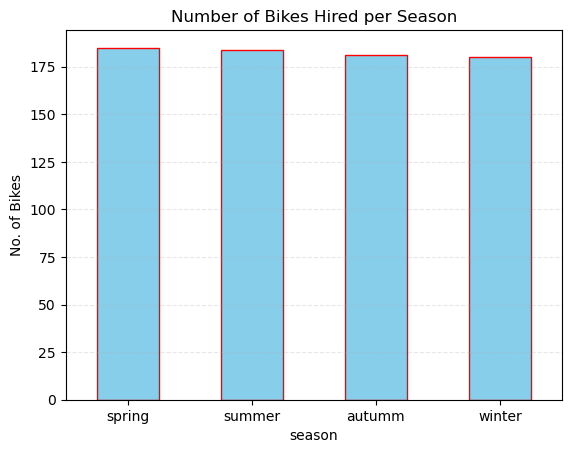

In [26]:
# plt.scatter(values_per_season)
values_per_season.plot(kind='bar', color='skyblue', edgecolor='red')
plt.title('Number of Bikes Hired per Season')
plt.xlabel('season')
plt.ylabel('No. of Bikes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [30]:
# 
# Install library to enable pd.read_excel()
!pip install openpyxl

In [29]:
# 
# Load excel data
titanic = pd.read_excel('../data/titanic.xlsx')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,body,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO",NaN,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",135.0,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,NaN


In [36]:
# 
# Load csvs
j1 = pd.read_csv('../data/joining_data1.csv')
j2 = pd.read_csv('../data/joining_data2.csv')
unn = pd.read_csv('../data/union_data.csv')
j1, j2, unn

(               name animal  age
 0   Catalie Portman    cat    3
 1      Pico de Gato    cat    5
 2         Chewbarka    dog    1
 3  Sir Isaac Mewton    cat    7
 4                K9    cat   11
 5         Arf Vader    dog    6,
                name  vaccinated
 0   Catalie Portman        True
 1      Pico de Gato        True
 2         Chewbarka       False
 3  Sir Isaac Mewton        True
 4                K9       False
 5         Spiderpig        True,
            name    animal  age
 0  Andy Warhowl       dog   12
 1     Voldetort  tortoise   90
 2       Repecka   chicken    1)

In [37]:
# 
# Perform a left join (Pick every row on the left)
leftie = pd.merge(
    left = j1,
    right = j2,
    how = 'left',
    on = 'name'
)
leftie

,name,animal,age,vaccinated
0,Catalie Portman,cat,3,True
1,Pico de Gato,cat,5,True
2,Chewbarka,dog,1,False
3,Sir Isaac Mewton,cat,7,True
4,K9,cat,11,False
5,Arf Vader,dog,6,NaN


## Aggregation

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
 12  body       121 non-null    float64
 13  boat       486 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [39]:
# 
# Show columns
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest', 'body', 'boat'],
      dtype='object')

In [40]:
# 
# Get the values for each sex
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [41]:
# 
# Number count of each sex
titanic['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [42]:
# 
# Check survival by sex (groups all from the same sex and sums all the survival values)
titanic.groupby('sex')['survived'].sum()

sex
female    339
male      161
Name: survived, dtype: int64

In [44]:
# 
# check survival by sex and the percentage on the total
titanic.groupby('sex')['survived'].agg(['sum', 'mean'])

,sum,mean
sex,,
female,339,0.727468
male,161,0.190985


## Homework

1. Does the ticket fare (fare), passenger class (pclass), family onboard (parch) affect chances of survival?
2. 